<a href="https://colab.research.google.com/github/CyperVoid/all-simplified-ml-labs/blob/main/exam_friendly_ml7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

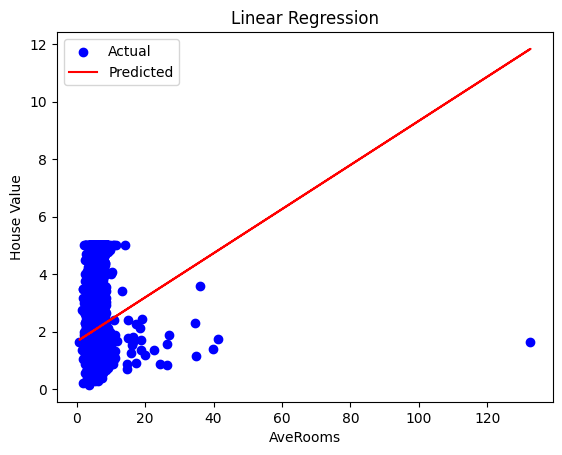

MSE: 1.2923314440807299
R^2: 0.013795337532284901


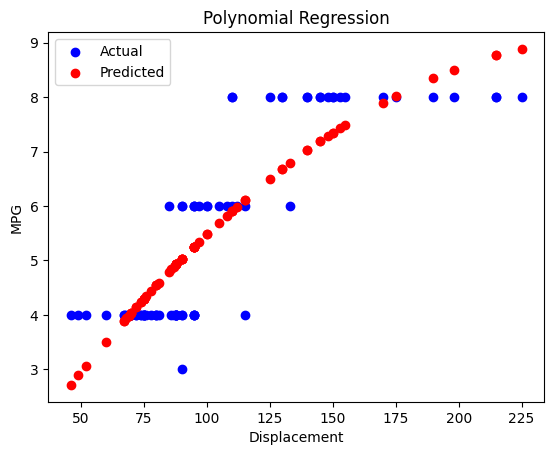

MSE: 0.7431490557205879
R^2: 0.7505650609469621


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression on California Housing
def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]]
    y = housing.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("AveRooms")
    plt.ylabel("House Value")
    plt.title("Linear Regression")
    plt.legend()
    plt.show()

    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R^2:", r2_score(y_test, y_pred))

# Polynomial Regression on Auto MPG
def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?").dropna()

    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("MPG")
    plt.title("Polynomial Regression")
    plt.legend()
    plt.show()

    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R^2:", r2_score(y_test, y_pred))

if __name__ == "__main__":
    linear_regression_california()
    polynomial_regression_auto_mpg()
